In [ ]:
# Import necessary libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from collections import Counter
from gensim import corpora, models
from wordcloud import WordCloud
import pandas as pd




In [ ]:
# Download NLTK data (if not already downloaded)
nltk.download('stopwords')
nltk.download('punkt')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Load your Twitter text data (replace 'tweets.csv' with your dataset)
data = pd.read_csv('Tweets.csv')
twitter_text = data['text']

# Text Pre-processing
def preprocess_text(text):
    if isinstance(text, str):  # Check if the text is a string
        # Tokenization and lowercase
        tokens = word_tokenize(text.lower())

        # Remove stopwords and non-alphanumeric characters
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

        return tokens
    else:
        return []  # Return an empty list for non-string inputs


In [ ]:
# Apply preprocessing to all Twitter text
preprocessed_text = [preprocess_text(text) for text in twitter_text]



In [ ]:
# Calculate word frequency and rank for Zipf's and Heaps' laws
word_freq = Counter([word for tokens in preprocessed_text for word in tokens])
word_rank = {word: rank for rank, (word, _) in enumerate(word_freq.most_common())}



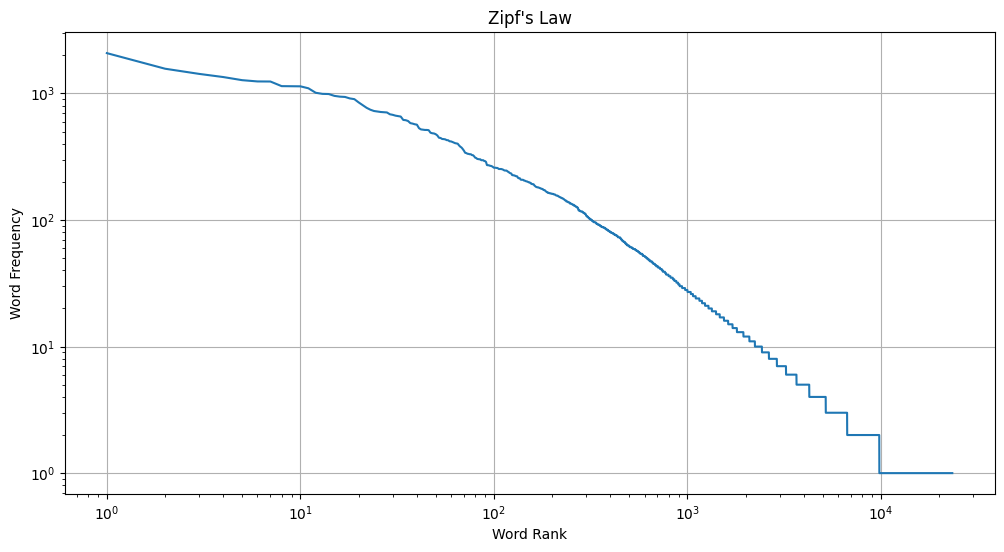

In [ ]:
# Plot Zipf's law
sorted_word_freq = sorted(word_freq.items(), key=lambda x: -x[1])
word, freq = zip(*sorted_word_freq)
plt.figure(figsize=(12, 6))
plt.loglog(range(1, len(freq) + 1), freq)
plt.xlabel('Word Rank')
plt.ylabel('Word Frequency')
plt.title("Zipf's Law")
plt.grid(True)
plt.show()



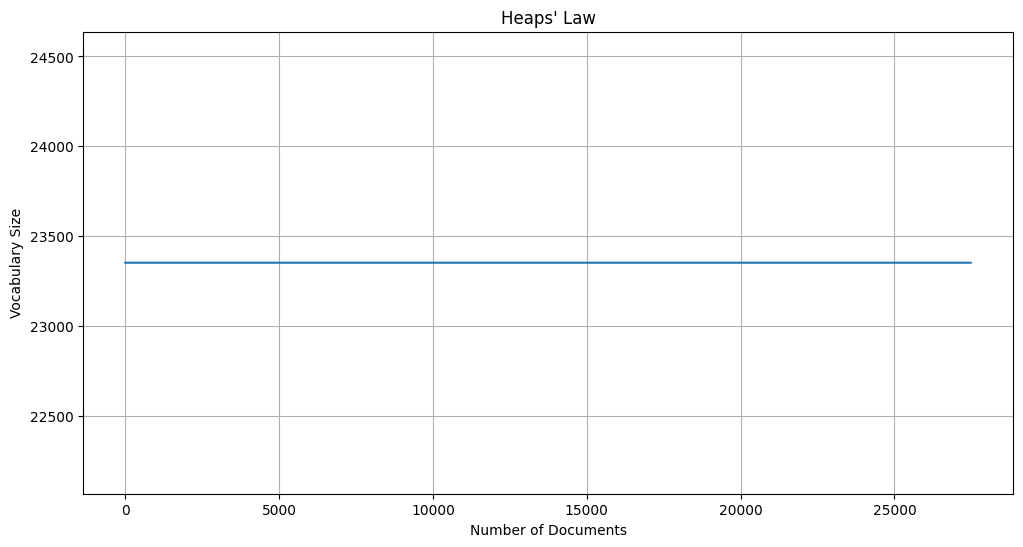

In [ ]:
# Plot Heaps' law
unique_words = set([word for tokens in preprocessed_text for word in tokens])
vocab_size = []
token_count = 0
for i, tokens in enumerate(preprocessed_text):
    token_count += len(tokens)
    vocab_size.append(len(unique_words))
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(vocab_size) + 1), vocab_size)
plt.xlabel('Number of Documents')
plt.ylabel('Vocabulary Size')
plt.title("Heaps' Law")
plt.grid(True)
plt.show()



In [ ]:
# Topic Modeling (using LDA as an example)
dictionary = corpora.Dictionary(preprocessed_text)
corpus = [dictionary.doc2bow(text) for text in preprocessed_text]
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)



(0, '0.050*"day" + 0.024*"happy" + 0.016*"good" + 0.013*"love" + 0.010*"mother"')
(1, '0.017*"wish" + 0.012*"u" + 0.010*"could" + 0.007*"would" + 0.006*"tired"')
(2, '0.017*"got" + 0.011*"thanks" + 0.009*"lol" + 0.008*"home" + 0.008*"working"')
(3, '0.015*"http" + 0.015*"night" + 0.012*"good" + 0.009*"really" + 0.008*"love"')
(4, '0.019*"go" + 0.016*"get" + 0.013*"work" + 0.011*"na" + 0.010*"know"')


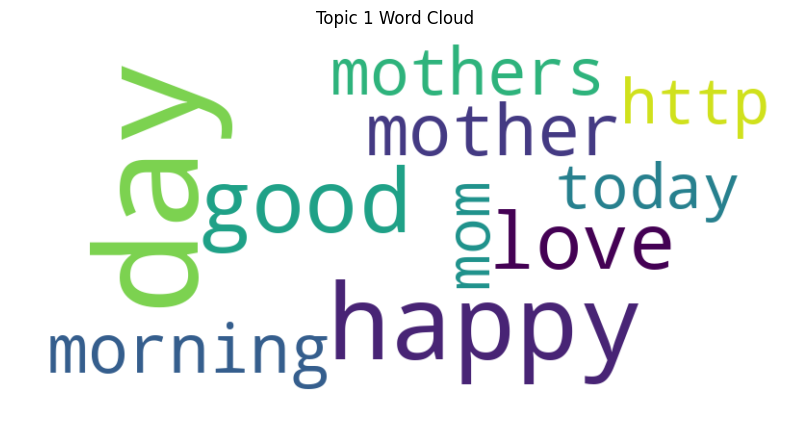

In [ ]:
# Generate a Word Cloud for a specific topic
topic_words = lda_model.show_topic(0, topn=10)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(topic_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Topic 1 Word Cloud")
plt.show()